In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from torchvision import transforms
import time
from torch.utils.data import TensorDataset, DataLoader

In [2]:
# 绘图函数
import matplotlib.pyplot as plt
def draw_loss(train_loss, test_loss):
    x = np.linspace(0, len(train_loss), len(train_loss))
    plt.plot(x, train_loss, label="Train Loss", linewidth=1.5)
    plt.plot(x, test_loss, label="Test Loss", linewidth=1.5)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [3]:
# 评价函数
def evaluate_accuracy(data_iter, model, loss_func):
    acc_sum, test_l_sum, n, c = 0.0, 0.0, 0, 0
    for X, y in data_iter:
        result = model.forward(X)
        acc_sum += (result.argmax(dim=1) == y).float().sum().item()
        test_l_sum += loss_func(result, y).item()
        n += y.shape[0]
        c += 1
    return acc_sum / n, test_l_sum / c

In [4]:
# 定义模型
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        # 模型参数
        num_inputs, num_outputs, num_hiddens = indim, outdim, hiddendim
        # 模型结构
        self.input_layer = lambda x: x.view(x.shape[0], -1)
        self.hidden_layer = nn.Sequential(
            nn.Linear(num_inputs, num_hiddens),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(num_hiddens, num_outputs)
        # 初始化参数
        for h_param in self.hidden_layer.parameters():
            torch.nn.init.normal_(h_param, mean=0, std=0.01)
        for o_param in self.output_layer.parameters():
            torch.nn.init.normal_(o_param, mean=0, std=0.01)
    def forward(self, x) :
        # 前向传播过
        flatten_input = self.input_layer(x)
        hidden_output = self.hidden_layer(flatten_input)
        final_output = self.output_layer(hidden_output)
        return final_output

In [5]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        # 模型参数
        num_inputs, num_outputs, num_hiddens1, num_hiddens2 = indim, outdim, hiddendim1, hiddendim2
        # 模型结构
        self.input_layer = lambda x: x.view(x.shape[0], -1)
        self.hidden_layer1 = nn.Sequential(
            nn.Linear(num_inputs, num_hiddens1),
            nn.ReLU()
        )
        self.hidden_layer2 = nn.Sequential(
            nn.Linear(num_hiddens1, num_hiddens2),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(num_hiddens2, num_outputs)
        # 初始化参数
        for h_param in self.hidden_layer1.parameters():
            torch.nn.init.normal_(h_param, mean=0, std=0.01)
        for h_param in self.hidden_layer2.parameters():
            torch.nn.init.normal_(h_param, mean=0, std=0.01)
        for o_param in self.output_layer.parameters():
            torch.nn.init.normal_(o_param, mean=0, std=0.01)
    def forward(self, x) :
        # 前向传播过
        flatten_input = self.input_layer(x)
        hidden_output1 = self.hidden_layer1(flatten_input)
        hidden_output2 = self.hidden_layer2(hidden_output1)
        final_output = self.output_layer(hidden_output2)
        return final_output

In [6]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        # 模型参数
        num_inputs, num_outputs, num_hiddens1, num_hiddens2, num_hiddens3 = indim, outdim, hiddendim1, hiddendim2, hiddendim3
        # 模型结构
        self.input_layer = lambda x: x.view(x.shape[0], -1)
        self.hidden_layer1 = nn.Sequential(
            nn.Linear(num_inputs, num_hiddens1),
            nn.ReLU()
        )
        self.hidden_layer2 = nn.Sequential(
            nn.Linear(num_hiddens1, num_hiddens2),
            nn.ReLU()
        )
        self.hidden_layer3 = nn.Sequential(
            nn.Linear(num_hiddens2, num_hiddens3),
            nn.ReLU()
        )
        self.output_layer = nn.Linear(num_hiddens3, num_outputs)
        # 初始化参数
        for h_param in self.hidden_layer1.parameters():
            torch.nn.init.normal_(h_param, mean=0, std=0.01)
        for h_param in self.hidden_layer2.parameters():
            torch.nn.init.normal_(h_param, mean=0, std=0.01)
        for h_param in self.hidden_layer3.parameters():
            torch.nn.init.normal_(h_param, mean=0, std=0.01)
        for o_param in self.output_layer.parameters():
            torch.nn.init.normal_(o_param, mean=0, std=0.01)
    def forward(self, x) :
        # 前向传播过
        flatten_input = self.input_layer(x)
        hidden_output1 = self.hidden_layer1(flatten_input)
        hidden_output2 = self.hidden_layer2(hidden_output1)
        hidden_output3 = self.hidden_layer3(hidden_output2)
        final_output = self.output_layer(hidden_output3)
        return final_output

In [7]:
def train(net, train_iter, loss_func, num_epochs, lr, optimizer):
    train_loss_list = []
    test_loss_list = []
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, c = 0.0,0.0, 0,0
        for X,y in train_iter:
            y_hat = net(X)
            l = loss_func(y_hat,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
            c += 1
        test_acc, test_loss = evaluate_accuracy(test_iter, net, loss_func)
        train_loss_list.append(train_l_sum / c)
        test_loss_list.append(test_loss)
        print(' epoch %d, train loss %.4f, test loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1,train_l_sum / c, test_loss, train_acc_sum / n, test_acc))
    return train_loss_list, test_loss_list

In [8]:
# minist数据集
mnist_train = torchvision.datasets.MNIST(root='~/Datasets/MNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='~/Datasets/MNIST',train=False, transform=transforms.ToTensor())
 
# 通过DataLoader 读取小批量数据样本
batch_size = 32
train_iter = DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=0)
test_iter = DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

 epoch 1, train loss 1.1700, test loss 0.4734, train acc 0.734, test acc 0.879
 epoch 2, train loss 0.4128, test loss 0.3481, train acc 0.887, test acc 0.902
 epoch 3, train loss 0.3405, test loss 0.3105, train acc 0.904, test acc 0.913
 epoch 4, train loss 0.3072, test loss 0.2826, train acc 0.912, test acc 0.920
 epoch 5, train loss 0.2837, test loss 0.2619, train acc 0.919, test acc 0.926
 epoch 6, train loss 0.2640, test loss 0.2473, train acc 0.925, test acc 0.931
 epoch 7, train loss 0.2464, test loss 0.2314, train acc 0.930, test acc 0.932
 epoch 8, train loss 0.2309, test loss 0.2176, train acc 0.935, test acc 0.939
 epoch 9, train loss 0.2167, test loss 0.2077, train acc 0.939, test acc 0.940
 epoch 10, train loss 0.2044, test loss 0.1958, train acc 0.942, test acc 0.943
 epoch 11, train loss 0.1931, test loss 0.1855, train acc 0.946, test acc 0.945
 epoch 12, train loss 0.1831, test loss 0.1774, train acc 0.949, test acc 0.949
 epoch 13, train loss 0.1738, test loss 0.1678, t

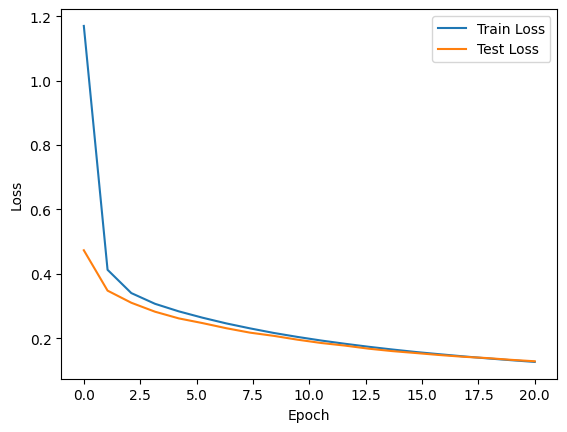

In [9]:
indim = 784
outdim = 10
hiddendim = 256 # 隐藏单元256
num_epochs = 20
lr = 0.01
net = Net1()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)

 epoch 1, train loss 1.2582, test loss 0.5063, train acc 0.701, test acc 0.869
 epoch 2, train loss 0.4314, test loss 0.3572, train acc 0.883, test acc 0.898
 epoch 3, train loss 0.3481, test loss 0.3118, train acc 0.902, test acc 0.911
 epoch 4, train loss 0.3118, test loss 0.2842, train acc 0.912, test acc 0.920
 epoch 5, train loss 0.2869, test loss 0.2646, train acc 0.918, test acc 0.925
 epoch 6, train loss 0.2665, test loss 0.2476, train acc 0.924, test acc 0.929
 epoch 7, train loss 0.2491, test loss 0.2325, train acc 0.929, test acc 0.934
 epoch 8, train loss 0.2341, test loss 0.2198, train acc 0.933, test acc 0.937
 epoch 9, train loss 0.2204, test loss 0.2082, train acc 0.937, test acc 0.939
 epoch 10, train loss 0.2077, test loss 0.1976, train acc 0.941, test acc 0.943
 epoch 11, train loss 0.1966, test loss 0.1872, train acc 0.945, test acc 0.946
 epoch 12, train loss 0.1868, test loss 0.1787, train acc 0.947, test acc 0.947
 epoch 13, train loss 0.1776, test loss 0.1721, t

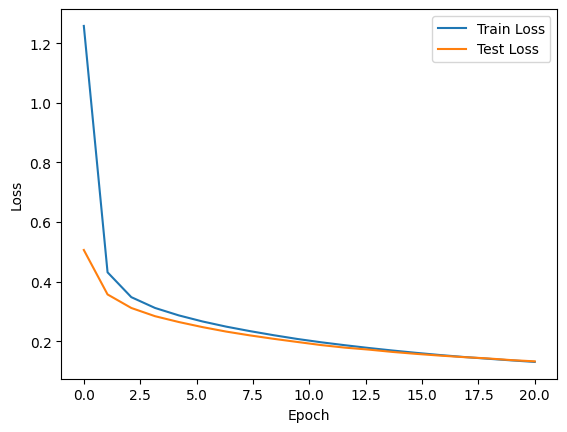

In [10]:
hiddendim = 128 # 隐藏单元128
net = Net1()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)

 epoch 1, train loss 1.0624, test loss 0.4499, train acc 0.765, test acc 0.880
 epoch 2, train loss 0.3990, test loss 0.3382, train acc 0.891, test acc 0.903
 epoch 3, train loss 0.3338, test loss 0.3005, train acc 0.905, test acc 0.914
 epoch 4, train loss 0.3016, test loss 0.2763, train acc 0.914, test acc 0.922
 epoch 5, train loss 0.2775, test loss 0.2583, train acc 0.921, test acc 0.927
 epoch 6, train loss 0.2566, test loss 0.2379, train acc 0.927, test acc 0.932
 epoch 7, train loss 0.2385, test loss 0.2232, train acc 0.933, test acc 0.936
 epoch 8, train loss 0.2224, test loss 0.2091, train acc 0.938, test acc 0.941
 epoch 9, train loss 0.2081, test loss 0.1967, train acc 0.942, test acc 0.944
 epoch 10, train loss 0.1953, test loss 0.1864, train acc 0.945, test acc 0.946
 epoch 11, train loss 0.1840, test loss 0.1765, train acc 0.948, test acc 0.949
 epoch 12, train loss 0.1738, test loss 0.1681, train acc 0.952, test acc 0.951
 epoch 13, train loss 0.1644, test loss 0.1595, t

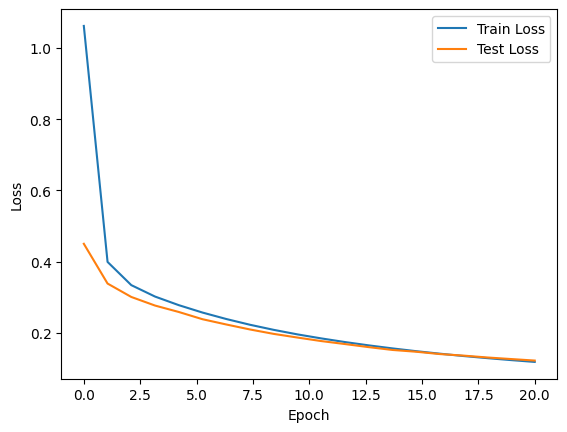

In [11]:
hiddendim = 512 # 隐藏单元512
net = Net1()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)

 epoch 1, train loss 2.1572, test loss 1.3483, train acc 0.272, test acc 0.585
 epoch 2, train loss 0.7480, test loss 0.4997, train acc 0.775, test acc 0.854
 epoch 3, train loss 0.4402, test loss 0.3748, train acc 0.873, test acc 0.890
 epoch 4, train loss 0.3542, test loss 0.3186, train acc 0.899, test acc 0.907
 epoch 5, train loss 0.3082, test loss 0.2804, train acc 0.912, test acc 0.920
 epoch 6, train loss 0.2697, test loss 0.2491, train acc 0.923, test acc 0.928
 epoch 7, train loss 0.2364, test loss 0.2155, train acc 0.932, test acc 0.938
 epoch 8, train loss 0.2079, test loss 0.1926, train acc 0.941, test acc 0.944
 epoch 9, train loss 0.1848, test loss 0.1710, train acc 0.947, test acc 0.950
 epoch 10, train loss 0.1668, test loss 0.1574, train acc 0.953, test acc 0.955
 epoch 11, train loss 0.1513, test loss 0.1473, train acc 0.957, test acc 0.957
 epoch 12, train loss 0.1380, test loss 0.1358, train acc 0.961, test acc 0.961
 epoch 13, train loss 0.1267, test loss 0.1279, t

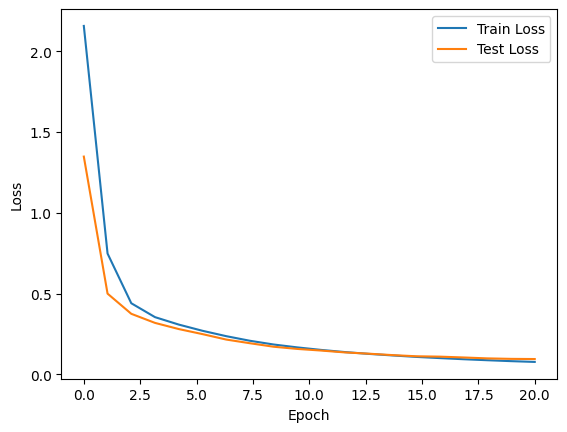

In [12]:
hiddendim1 = 512
hiddendim2 = 256
net = Net2()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)

 epoch 1, train loss 2.3016, test loss 2.3009, train acc 0.111, test acc 0.114
 epoch 2, train loss 2.3010, test loss 2.3006, train acc 0.112, test acc 0.114
 epoch 3, train loss 2.3006, test loss 2.2999, train acc 0.112, test acc 0.114
 epoch 4, train loss 2.2988, test loss 2.2959, train acc 0.112, test acc 0.114
 epoch 5, train loss 2.2322, test loss 1.9521, train acc 0.171, test acc 0.247
 epoch 6, train loss 1.2992, test loss 0.8959, train acc 0.517, test acc 0.720
 epoch 7, train loss 0.6531, test loss 0.5359, train acc 0.805, test acc 0.845
 epoch 8, train loss 0.4876, test loss 0.4230, train acc 0.860, test acc 0.879
 epoch 9, train loss 0.3813, test loss 0.3333, train acc 0.893, test acc 0.903
 epoch 10, train loss 0.2976, test loss 0.2718, train acc 0.916, test acc 0.926
 epoch 11, train loss 0.2374, test loss 0.2280, train acc 0.935, test acc 0.937
 epoch 12, train loss 0.1964, test loss 0.1908, train acc 0.946, test acc 0.949
 epoch 13, train loss 0.1672, test loss 0.1726, t

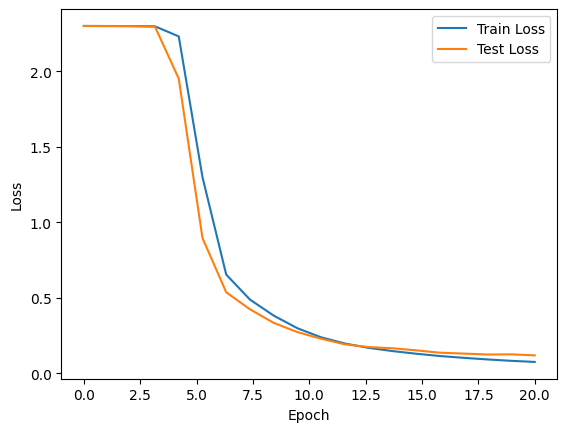

In [13]:
hiddendim1 = 512
hiddendim2 = 256
hiddendim3 = 128
net = Net3()
optimizer = torch.optim.SGD(net.parameters(), lr)
time_start = time.time()
train_loss, test_loss = train(net, train_iter, loss, num_epochs, lr, optimizer)
time_end = time.time()
print("time spend: %.6f second" % (time_end - time_start))
draw_loss(train_loss,test_loss)